## TP2_AS_Amina_Kardous

In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer,CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD

# Partie 1

In [2]:
credit=pd.read_csv('/Users/Kardoussa/Documents/MachineLearning/AS/AS/credit_scoring.csv',sep=";",header=0)

In [3]:
credit.head(10)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


In [4]:
credit.shape

(4375, 14)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seniority  4375 non-null   float64
 1   Home       4375 non-null   float64
 2   Time       4375 non-null   float64
 3   Age        4375 non-null   float64
 4   Marital    4375 non-null   float64
 5   Records    4375 non-null   float64
 6   Job        4375 non-null   float64
 7   Expenses   4375 non-null   float64
 8   Income     4375 non-null   float64
 9   Assets     4375 non-null   float64
 10  Debt       4375 non-null   float64
 11  Amount     4375 non-null   float64
 12  Price      4375 non-null   float64
 13  Status     4375 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 478.6 KB


* The dataset contains 14 numerical variables
* Status is the target
* There are no missing values in the dataset

In [6]:
credit.dtypes

Seniority    float64
Home         float64
Time         float64
Age          float64
Marital      float64
Records      float64
Job          float64
Expenses     float64
Income       float64
Assets       float64
Debt         float64
Amount       float64
Price        float64
Status         int64
dtype: object

In [7]:
credit.describe()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


In [8]:
credit.isnull().any

<bound method DataFrame.any of       Seniority   Home   Time    Age  Marital  Records    Job  Expenses  \
0         False  False  False  False    False    False  False     False   
1         False  False  False  False    False    False  False     False   
2         False  False  False  False    False    False  False     False   
3         False  False  False  False    False    False  False     False   
4         False  False  False  False    False    False  False     False   
...         ...    ...    ...    ...      ...      ...    ...       ...   
4370      False  False  False  False    False    False  False     False   
4371      False  False  False  False    False    False  False     False   
4372      False  False  False  False    False    False  False     False   
4373      False  False  False  False    False    False  False     False   
4374      False  False  False  False    False    False  False     False   

      Income  Assets   Debt  Amount  Price  Status  
0      False   

In [9]:
credit.isnull().sum()

Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
Status       0
dtype: int64

In [10]:
X=credit.iloc[:,:13].values
Y=credit.iloc[:,13].values

In [11]:
mp=100*np.sum(Y==0)/len(Y)
bp=100*np.sum(Y==1)/len(Y)

print("% Bon payeurs : {0:.2f} % Mauvais payeurs : {1:.2f}".format(bp,mp))

% Bon payeurs : 72.21 % Mauvais payeurs : 27.79


In [12]:
credit['Status'].nunique()

2

In [13]:
credit['Status'].value_counts()

1    3159
0    1216
Name: Status, dtype: int64

In [14]:
credit['Status'].value_counts()/len(credit)

1    0.722057
0    0.277943
Name: Status, dtype: float64

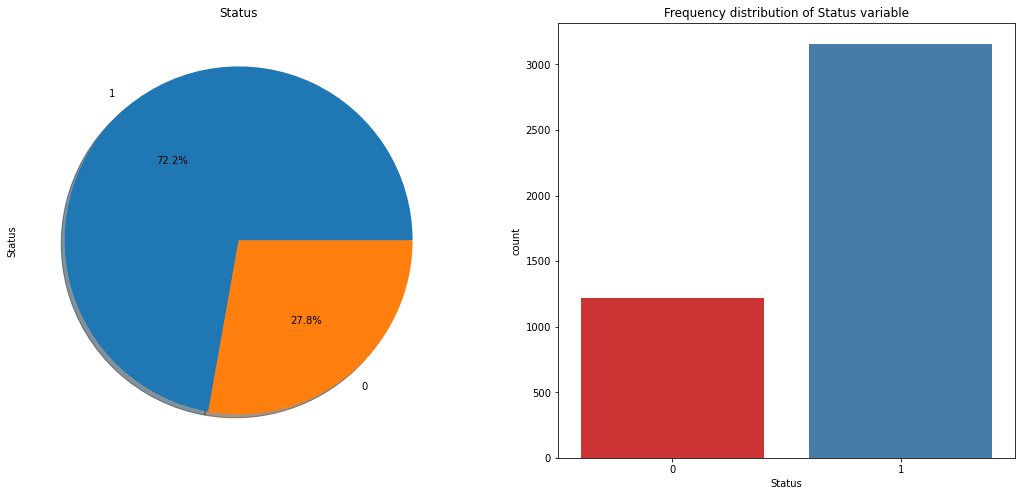

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = credit['Status'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Status", data=credit, palette="Set1")
ax[1].set_title("Frequency distribution of Status variable")

plt.show()

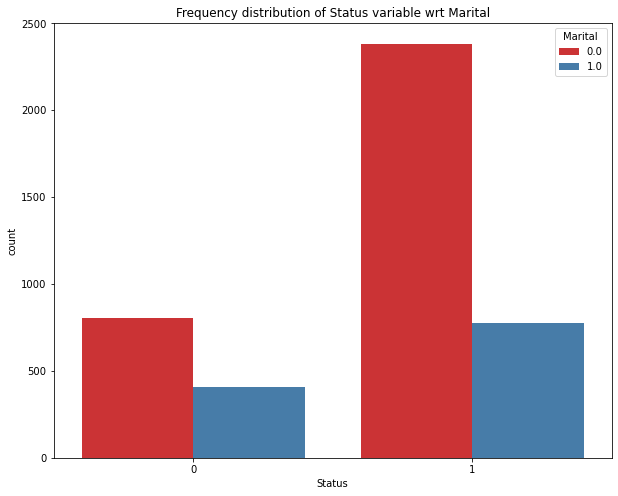

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Status", hue="Marital", data=credit, palette="Set1")
ax.set_title("Frequency distribution of Status variable wrt Marital")
plt.show()

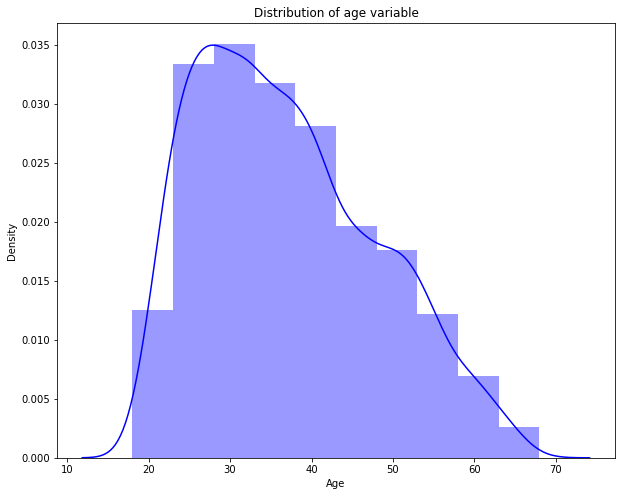

In [17]:
f, ax = plt.subplots(figsize=(10,8))
x = credit['Age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

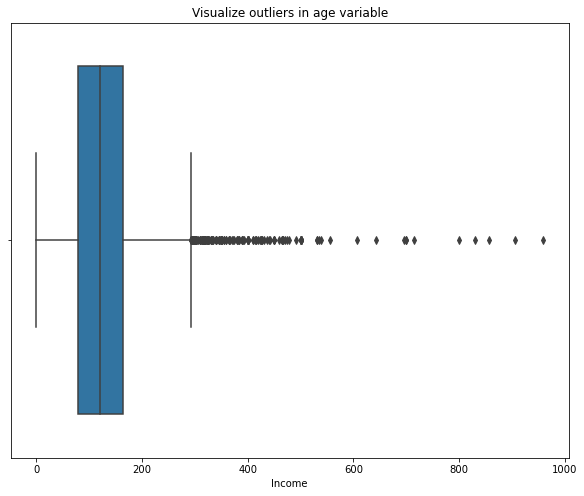

In [18]:
f, ax = plt.subplots(figsize=(10,8))
x = credit['Income']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

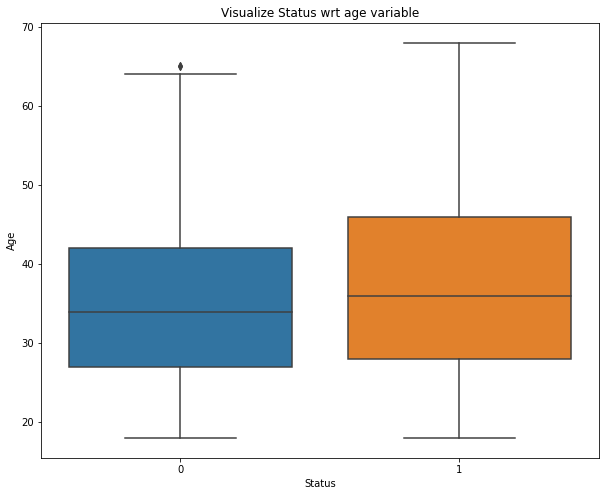

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Status", y="Age", data=credit)
ax.set_title("Visualize Status wrt age variable")
plt.show()

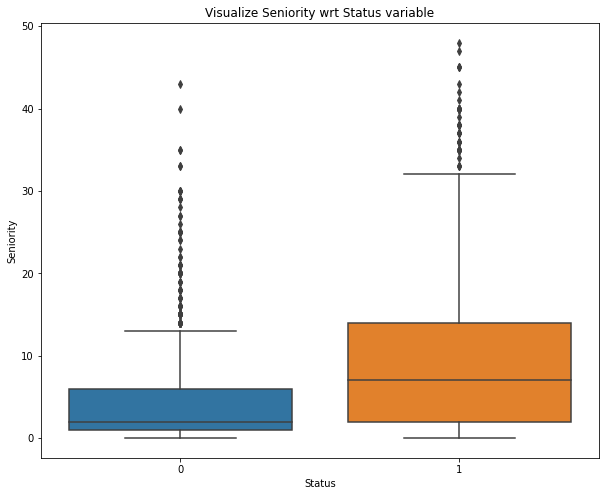

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Status", y="Seniority", data=credit)
ax.set_title("Visualize Seniority wrt Status variable")
plt.show()

In [21]:

credit.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
Seniority,1.0,-0.2348,-0.01844,0.5084,-0.235,-0.01799,-0.1629,0.1252,0.1344,0.1475,-0.01619,-0.01203,0.0368,0.2638
Home,-0.2348,1.0,0.02283,-0.2935,0.3106,0.03183,-0.009961,-0.04912,-0.1313,-0.2969,-0.1874,-0.03483,-0.1024,-0.2102
Time,-0.01844,0.02283,1.0,-0.0524,-0.03213,0.02831,-0.1327,-0.00207,-0.01362,-0.08004,0.06155,0.44,0.1343,-0.1064
Age,0.5084,-0.2935,-0.0524,1.0,-0.3704,0.05881,0.07054,0.2459,0.1175,0.2075,-0.05164,0.02426,0.0454,0.1005
Marital,-0.235,0.3106,-0.03213,-0.3704,1.0,-0.03287,0.01406,-0.5087,-0.1324,-0.07685,-0.04962,-0.06212,-0.09402,-0.09224
Records,-0.01799,0.03183,0.02831,0.05881,-0.03287,1.0,0.02494,0.05336,0.02145,0.01877,0.01651,0.1067,0.07944,-0.2767
Job,-0.1629,-0.009961,-0.1327,0.07054,0.01406,0.02494,1.0,0.003806,-0.1469,0.1712,0.0195,0.04133,0.02957,-0.2091
Expenses,0.1252,-0.04912,-0.00207,0.2459,-0.5087,0.05336,0.003806,1.0,0.2416,0.01681,0.01451,0.04504,0.03948,-0.0297
Income,0.1344,-0.1313,-0.01362,0.1175,-0.1324,0.02145,-0.1469,0.2416,1.0,0.1468,0.1059,0.1401,0.1675,0.2059
Assets,0.1475,-0.2969,-0.08004,0.2075,-0.07685,0.01877,0.1712,0.01681,0.1468,1.0,0.1849,0.1551,0.2173,0.1071


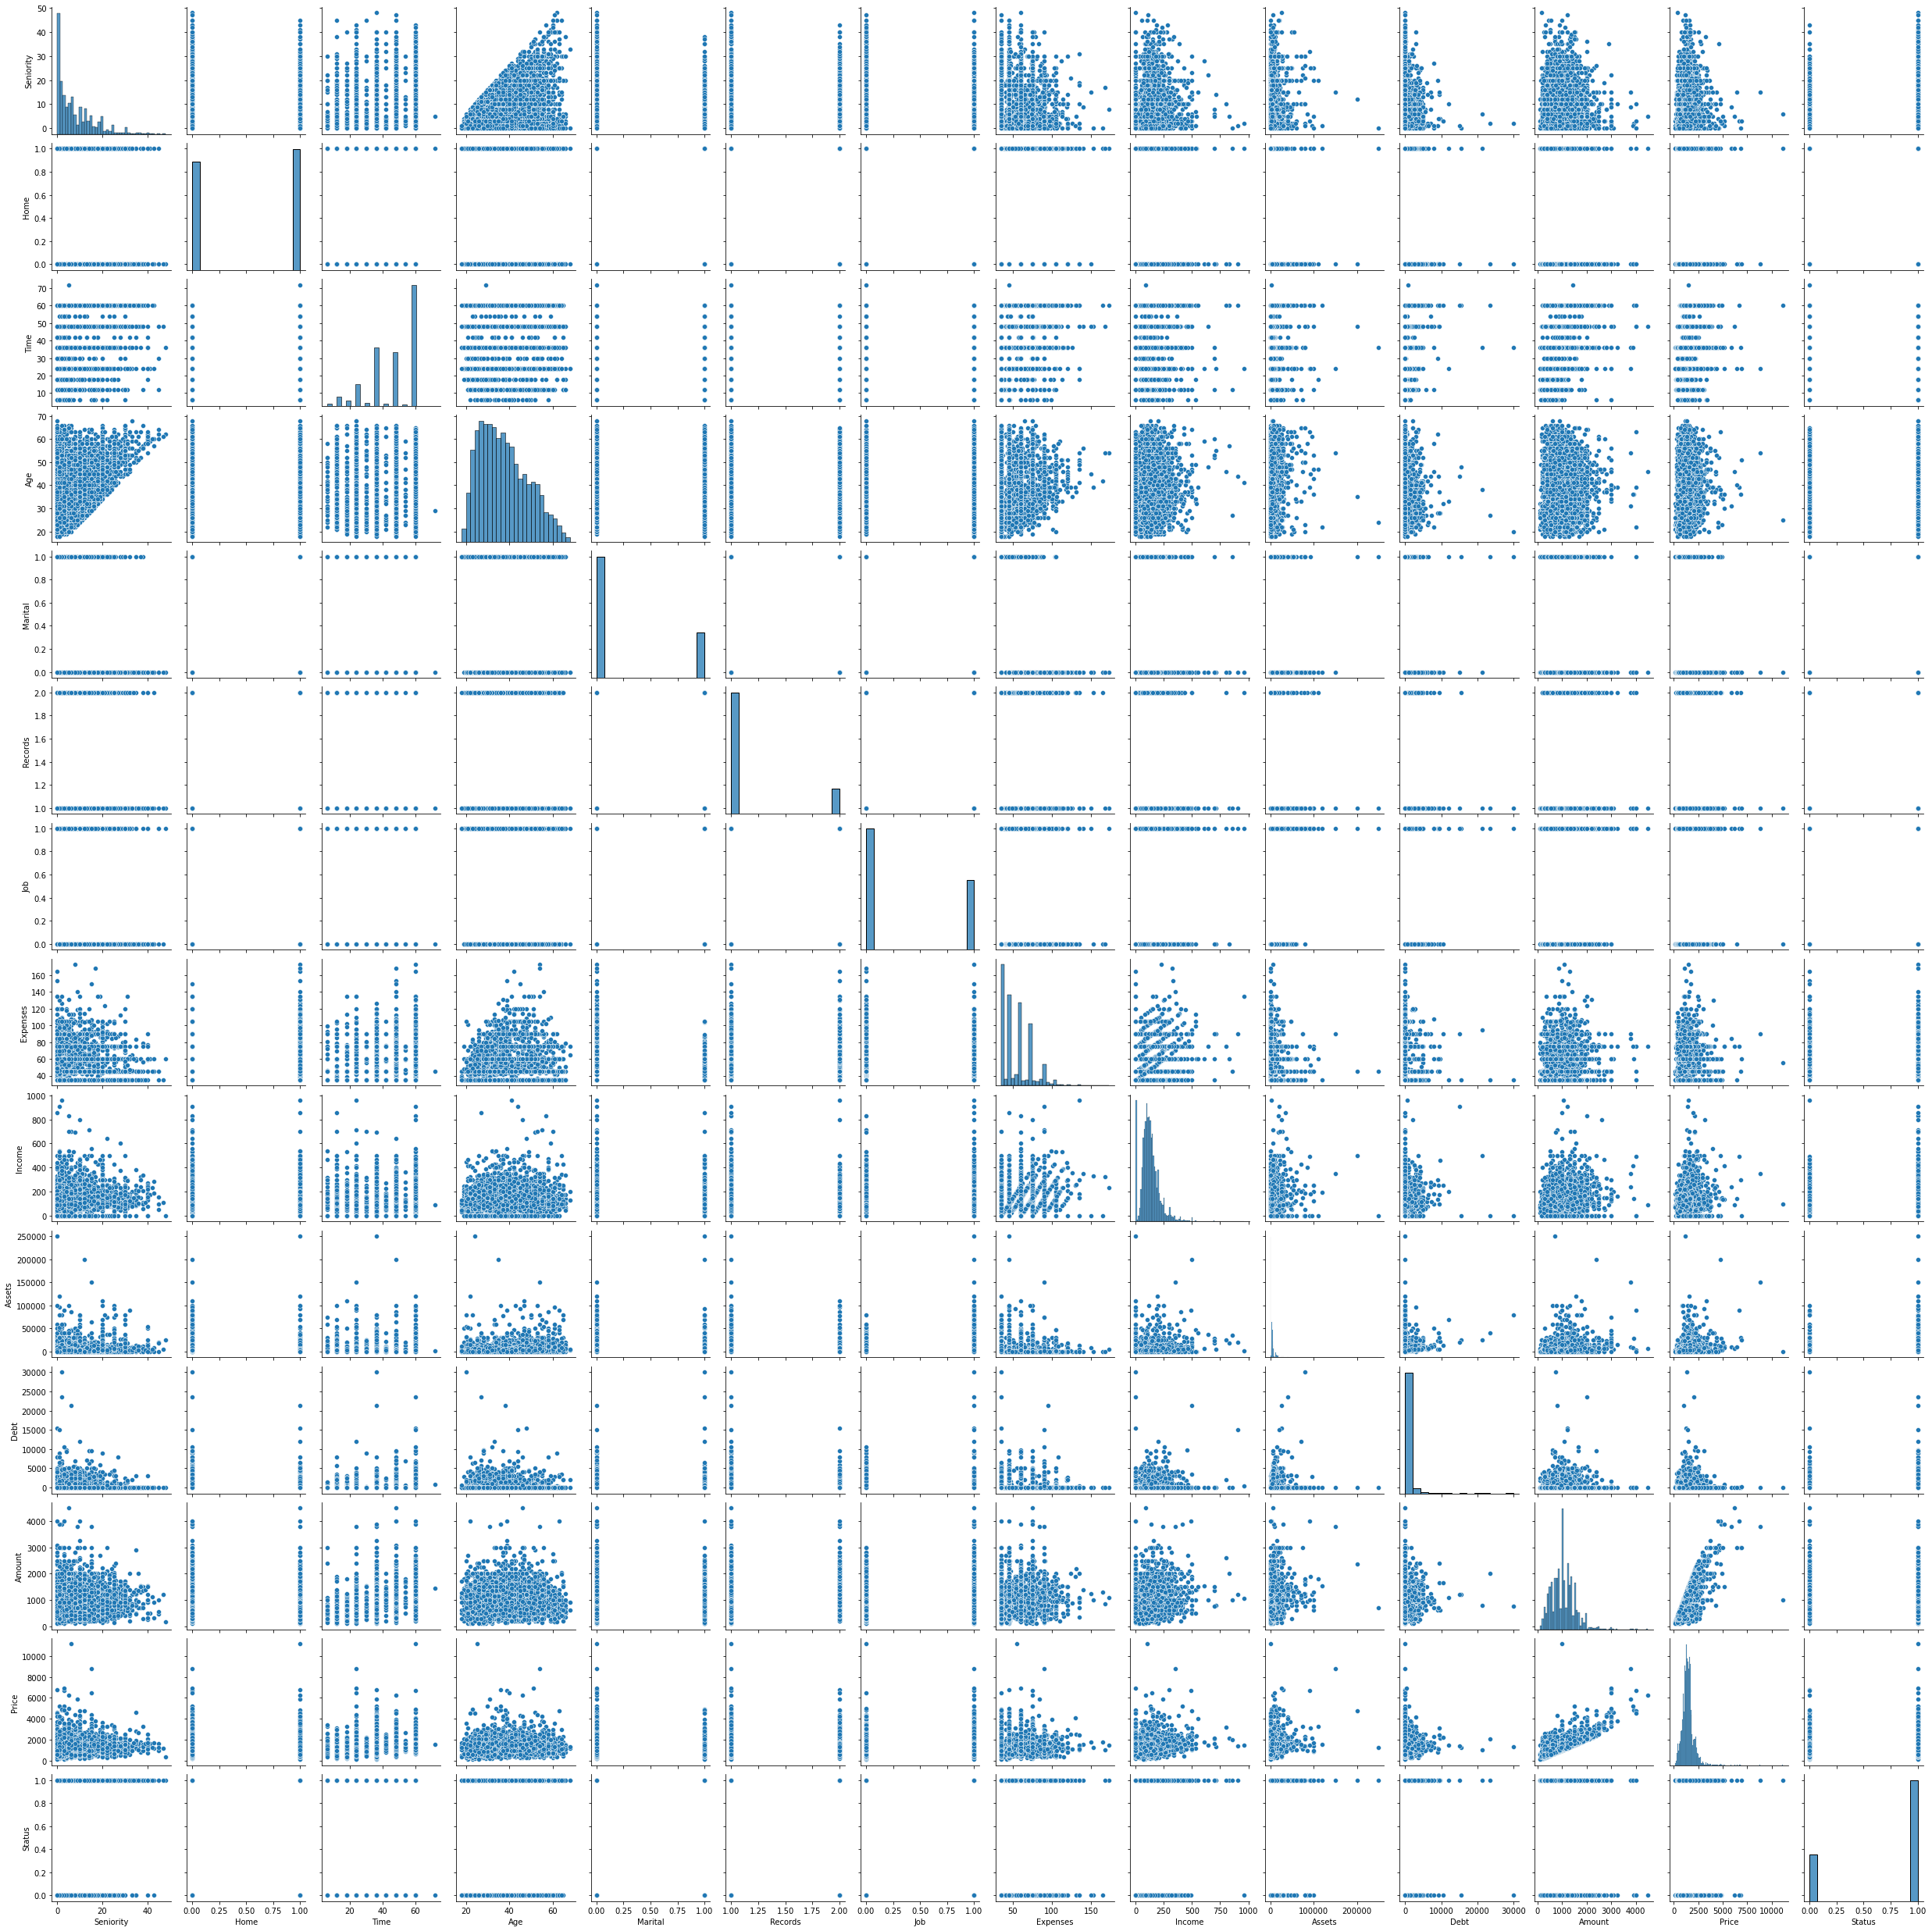

In [22]:
sns.pairplot(credit)
plt.show()

In [23]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1)

##  Classifiers

In [24]:
def classifieurs(Xtrain,Xtest,Ytrain,Ytest):
    DT=DecisionTreeClassifier(criterion='gini',random_state=1) #CART
    DT.fit(Xtrain,Ytrain)
    YDT=DT.predict(Xtest)

    print("Arbre de décision : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YDT)*100))
    print("Arbre de décision : rappel = {0:.2f}".format(recall_score(Ytest,YDT)))
    print("Arbre de décision: precision  = {0:.2f}".format(precision_score(Ytest,YDT)))
    print(confusion_matrix(Ytest,YDT))
    print(classification_report(Ytest, YDT))

    KNN=KNeighborsClassifier(n_neighbors=5) #KNN
    KNN.fit(Xtrain,Ytrain)
    YKNN=KNN.predict(Xtest)

    print("KNN : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YKNN)*100))
    print("KNN : rappel  = {0:.2f}".format(recall_score(Ytest,YKNN)))
    print("KNN : precision  = {0:.2f}".format(precision_score(Ytest,YKNN)))
    print(confusion_matrix(Ytest,YKNN))
    print(classification_report(Ytest, YKNN))
    
    BAG=BaggingClassifier(n_estimators=100,random_state=1) #BAG
    BAG.fit(Xtrain,Ytrain)
    YBAG=BAG.predict(Xtest)
    
    print("Bagging : Accuracy = {0:.2f}".format(accuracy_score(Ytest,YBAG)*100))
    print("Bagging : rappel  = {0:.2f}".format(recall_score(Ytest,YBAG)))
    print("Bagging : precision  = {0:.2f}".format(precision_score(Ytest,YBAG)))
    print(confusion_matrix(Ytest,YBAG))
        

In [26]:
classifieurs(Xtrain,Xtest,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.71
Arbre de décision : rappel = 0.80
Arbre de décision: precision  = 0.82
[[ 325  279]
 [ 318 1266]]
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       604
           1       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188

KNN : Accuracy = 72.49
KNN : rappel  = 0.88
KNN : precision  = 0.77
[[ 189  415]
 [ 187 1397]]
              precision    recall  f1-score   support

           0       0.50      0.31      0.39       604
           1       0.77      0.88      0.82      1584

    accuracy                           0.72      2188
   macro avg       0.64      0.60      0.60      2188
weighted avg       0.70      0.72      0.70      2188

Bagging : Accuracy = 78.56
Bagging : rappel  = 0.88
Bagging : precision  = 0.84
[[ 332  272]
 [ 197 1387]]


Recall is the ability of a model to find all the relevant cases within a dataset: nbr of True Positives divided by the nbr of True Positives plus the Nbr of False Negatives. Recall enables us to find all the data points of interest in a dataset.

In our case 

Recall =  good spenders correctly identified divided by (good spenders correctly identified + good spenders incorrectly labeled as bad spenders)

On the other hand Precision is defined as the nbr of True Positives divided by the nbr of True Positives plus False Positives which are in our case individuals who are labeled as good spenders when they actually are not.
Precision tells us which of the relevent cases were actually relevent, in other words it tells us how many of the points that should have been selected got actually selected.

#### we understand that precision is the preferable metric for our problem because we have intrest not to attribue money to people who wont be able to pay it back.

#### results with KNN are less performant than those with CART because it has better precision and better accuracy.

### Data Normalisation

In [27]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)

# transform training data
X_train_norm = norm.transform(Xtrain)

# transform testing dataabs
X_test_norm = norm.transform(Xtest)
classifieurs(X_train_norm,X_test_norm,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.85
Arbre de décision : rappel = 0.80
Arbre de décision: precision  = 0.82
[[ 325  279]
 [ 315 1269]]
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       604
           1       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188

KNN : Accuracy = 74.54
KNN : rappel  = 0.85
KNN : precision  = 0.81
[[ 283  321]
 [ 236 1348]]
              precision    recall  f1-score   support

           0       0.55      0.47      0.50       604
           1       0.81      0.85      0.83      1584

    accuracy                           0.75      2188
   macro avg       0.68      0.66      0.67      2188
weighted avg       0.74      0.75      0.74      2188

Bagging : Accuracy = 78.56
Bagging : rappel  = 0.88
Bagging : precision  = 0.84
[[ 333  271]
 [ 198 1386]]


In [28]:
SS=StandardScaler()
SS.fit(Xtrain)
Xtrain_norm=SS.transform(Xtrain)
Xtest_norm=SS.transform(Xtest)

classifieurs(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.71
Arbre de décision : rappel = 0.80
Arbre de décision: precision  = 0.82
[[ 322  282]
 [ 315 1269]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       604
           1       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.66      2188
weighted avg       0.73      0.73      0.73      2188

KNN : Accuracy = 75.27
KNN : rappel  = 0.86
KNN : precision  = 0.81
[[ 286  318]
 [ 223 1361]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       604
           1       0.81      0.86      0.83      1584

    accuracy                           0.75      2188
   macro avg       0.69      0.67      0.67      2188
weighted avg       0.74      0.75      0.75      2188

Bagging : Accuracy = 78.56
Bagging : rappel  = 0.88
Bagging : precision  = 0.84
[[ 333  271]
 [ 198 1386]]


#### when we use normalised data , we notice that we get better results with KNN based on accuracy metric but not on precision which is little less important in this case.


### feature creation and selection

In [29]:
pca=PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca_best=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
Xtest_pca_best=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)


NameError: name 'Xtrain_pca' is not defined

In [30]:
pca=PCA(n_components=5)
pca.fit(Xtrain_norm)
Xtrain_pca=np.concatenate((Xtrain_norm,pca.transform(Xtrain_norm)),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,pca.transform(Xtest_norm)),axis=1)

classifieurs(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Arbre de décision : Accuracy = 71.85
Arbre de décision : rappel = 0.80
Arbre de décision: precision  = 0.81
[[ 297  307]
 [ 309 1275]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       604
           1       0.81      0.80      0.81      1584

    accuracy                           0.72      2188
   macro avg       0.65      0.65      0.65      2188
weighted avg       0.72      0.72      0.72      2188

KNN : Accuracy = 75.69
KNN : rappel  = 0.87
KNN : precision  = 0.81
[[ 283  321]
 [ 211 1373]]
              precision    recall  f1-score   support

           0       0.57      0.47      0.52       604
           1       0.81      0.87      0.84      1584

    accuracy                           0.76      2188
   macro avg       0.69      0.67      0.68      2188
weighted avg       0.74      0.76      0.75      2188

Bagging : Accuracy = 77.74
Bagging : rappel  = 0.88
Bagging : precision  = 0.82
[[ 301  303]
 [ 184 1400]]


#### when we concatenate our initial data along with three pca we get better results of the models.

In [31]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain_norm, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)     

In [33]:
sorted_idx = np.argsort(importances)[::-1]

In [34]:
features = credit.columns
print(features[sorted_idx])

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5]
28431
2187


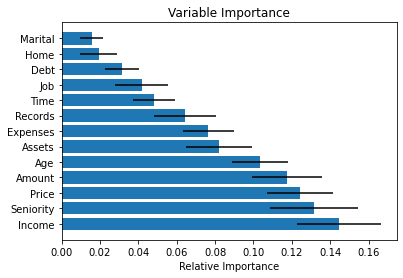

In [35]:
padding = np.arange(Xtrain_norm.size/len(Xtrain_norm)) + 0.5
print(padding)
print(Xtrain_norm.size)
print(len(Xtrain_norm))
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

#### We understand from the above plot that the most important feature is Income and the least important one is Marital.

# Random Forest Built on selected features

In [36]:
Xtrain = np.delete(Xtrain, 12, 1)

In [37]:
Xtest = np.delete(Xtest, 12, 1)

In [38]:
classifieurs(Xtrain,Xtest,Ytrain,Ytest)

Arbre de décision : Accuracy = 71.62
Arbre de décision : rappel = 0.79
Arbre de décision: precision  = 0.81
[[ 315  289]
 [ 332 1252]]
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       604
           1       0.81      0.79      0.80      1584

    accuracy                           0.72      2188
   macro avg       0.65      0.66      0.65      2188
weighted avg       0.72      0.72      0.72      2188

KNN : Accuracy = 72.76
KNN : rappel  = 0.89
KNN : precision  = 0.77
[[ 177  427]
 [ 169 1415]]
              precision    recall  f1-score   support

           0       0.51      0.29      0.37       604
           1       0.77      0.89      0.83      1584

    accuracy                           0.73      2188
   macro avg       0.64      0.59      0.60      2188
weighted avg       0.70      0.73      0.70      2188

Bagging : Accuracy = 78.15
Bagging : rappel  = 0.86
Bagging : precision  = 0.84
[[ 342  262]
 [ 216 1368]]


In [39]:
classifieurs(Xtrain_pca_best,Xtest_pca_best,Ytrain,Ytest)

Arbre de décision : Accuracy = 73.63
Arbre de décision : rappel = 0.80
Arbre de décision: precision  = 0.83
[[ 351  253]
 [ 324 1260]]
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       604
           1       0.83      0.80      0.81      1584

    accuracy                           0.74      2188
   macro avg       0.68      0.69      0.68      2188
weighted avg       0.75      0.74      0.74      2188

KNN : Accuracy = 75.64
KNN : rappel  = 0.87
KNN : precision  = 0.81
[[ 283  321]
 [ 212 1372]]
              precision    recall  f1-score   support

           0       0.57      0.47      0.52       604
           1       0.81      0.87      0.84      1584

    accuracy                           0.76      2188
   macro avg       0.69      0.67      0.68      2188
weighted avg       0.74      0.76      0.75      2188

Bagging : Accuracy = 78.61
Bagging : rappel  = 0.89
Bagging : precision  = 0.83
[[ 317  287]
 [ 181 1403]]


In [40]:
classifieurs(X_train_norm,X_test_norm,Ytrain,Ytest)

Arbre de décision : Accuracy = 72.85
Arbre de décision : rappel = 0.80
Arbre de décision: precision  = 0.82
[[ 325  279]
 [ 315 1269]]
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       604
           1       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188

KNN : Accuracy = 74.54
KNN : rappel  = 0.85
KNN : precision  = 0.81
[[ 283  321]
 [ 236 1348]]
              precision    recall  f1-score   support

           0       0.55      0.47      0.50       604
           1       0.81      0.85      0.83      1584

    accuracy                           0.75      2188
   macro avg       0.68      0.66      0.67      2188
weighted avg       0.74      0.75      0.74      2188

Bagging : Accuracy = 78.56
Bagging : rappel  = 0.88
Bagging : precision  = 0.84
[[ 333  271]
 [ 198 1386]]


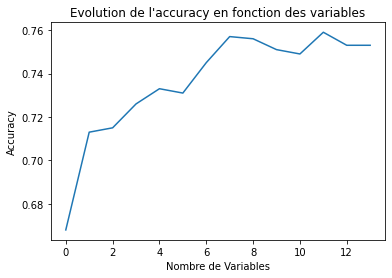

In [41]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_norm.shape[1]+1)
for f in np.arange(0, Xtrain_norm.shape[1]+1):
    X1_f = Xtrain_norm[:,sorted_idx[:f+1]]
    X2_f = Xtest_norm[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Ytrain)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Ytest,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

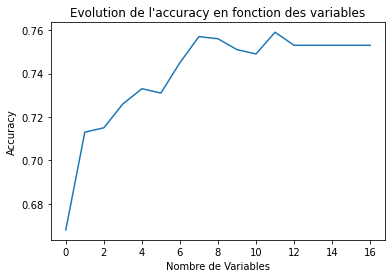

In [42]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_pca_best.shape[1]+1)
for f in np.arange(0, Xtrain_pca_best.shape[1]+1):
    X1_f = Xtrain_pca_best[:,sorted_idx[:f+1]]
    X2_f = Xtest_pca_best[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Ytrain)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Ytest,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [43]:
Xtrain_pca_best = pd.DataFrame(Xtrain_pca_best)
Xtest_pca_best = pd.DataFrame(Xtest_pca_best)

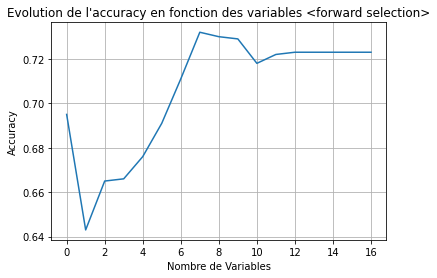

In [44]:
DT=DecisionTreeClassifier(criterion='gini',random_state=1)
scores=np.zeros(Xtrain_pca_best.shape[1]+1)
for f in np.arange(0, Xtrain_pca_best.shape[1]+1):
 X1_f = Xtrain_pca_best.iloc[:,sorted_idx[:f+1]]
 X2_f = Xtest_pca_best.iloc[:,sorted_idx[:f+1]]
 DT.fit(X1_f,Ytrain)
 YDT=DT.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YDT),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <forward selection>")
plt.grid()
plt.show()


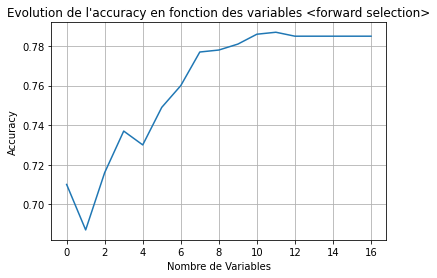

In [45]:
BAG=BaggingClassifier(n_estimators=100,random_state=1)
scores=np.zeros(Xtrain_pca_best.shape[1]+1)
for f in np.arange(0, Xtrain_pca_best.shape[1]+1):
 X1_f = Xtrain_pca_best.iloc[:,sorted_idx[:f+1]]
 X2_f = Xtest_pca_best.iloc[:,sorted_idx[:f+1]]
 BAG.fit(X1_f,Ytrain)
 YBAG=BAG.predict(X2_f)
 scores[f]=np.round(accuracy_score(Ytest,YBAG),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables <forward selection>")
plt.grid()
plt.show()


# Grid Search: Best classifiers

## KNN

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
k_range = list(range(1,8))
param_grid = dict(n_neighbors=k_range)

In [48]:
grid = GridSearchCV(KNN, param_grid, n_jobs= -1, cv=5, scoring='accuracy')
grid_results = grid.fit(Xtrain_pca, Ytrain)


In [49]:
grid_results.best_score_

0.752158239553619

In [50]:
grid_results.best_estimator_


KNeighborsClassifier(n_neighbors=7)

In [51]:
grid_results.best_params_

{'n_neighbors': 7}

#### We understand that the best estimator for KNN is obtained with k=7 

## Random Forest

In [52]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [53]:
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy', cv = 5, n_jobs = -1 , verbose = 2)

In [54]:
gs.fit(Xtrain_pca,Ytrain)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy', verbose=2)

In [55]:
gs.best_params_


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
best_grid = gs.best_estimator_
print(best_grid)

In [ ]:
br = gs.best_score_
print(br)


## Pipeline Creation 

Pipeline is a function thaat sequentially applies a list of transforms 
and a final estimator. 

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle

df =pd.read_csv('/Users/Kardoussa/Documents/MachineLearning/AS/AS/credit_scoring.csv',sep=";",header=0)
X=df.iloc[:,:13]
Y=df.iloc[:,13]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=1)

classifier_names = ["KNN", "Random Forest"]

classifiers = [KNeighborsClassifier(), RandomForestClassifier()]

zipped_clf = zip(classifier_names,classifiers)

def classifier(classifier, x_train, y_train, x_test, y_test):
    result = []
    for n,c in classifier:
        pipeline = Pipeline([('ss',StandardScaler()),
                    ('FU',FeatureUnion([('ss',StandardScaler()),("pca", PCA(n_components=3))])),
                    ('classifieur', c)
                    ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(pipeline, x_train, y_train, x_test,y_test)
        result.append((n,clf_acc))
      
 # Save the pipeline to file in the current working directory
 
        with open('pipeline1.py', 'wb') as file:
            pickle.dump(pipeline, file)
    return result
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy
result = classifier(zipped_clf, X_train, Y_train, X_test, Y_test)

acc = {}
for i in range(len(result)):
    acc[result[i][0]] = result[i][1]*100
    print('algorithm = ',result[i][0], '\naccuracy =',result[i][1]*100)


Validation result for KNN
KNeighborsClassifier()
accuracy score: 75.64%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 78.47%
algorithm =  KNN 
accuracy = 75.6398537477148
algorithm =  Random Forest 
accuracy = 78.47349177330895


## Comparaison of different supervised learning algorithms

In [144]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from time import time

# load dataset
df =pd.read_csv('/Users/Kardoussa/Documents/MachineLearning/AS/AS/credit_scoring.csv',sep=";",header=0)
X=df.iloc[:,:13]
Y=df.iloc[:,13]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=1)

# prepare models
clfs = {
'RF': RandomForestClassifier(n_estimators=50, random_state=1),
'KNN': KNeighborsClassifier(n_neighbors=10), 
'nb': GaussianNB(),
'gb': GradientBoostingClassifier(n_estimators=100, random_state=1),
'svc': SVC(C=100, probability=True),
'nn': MLPClassifier((80, 10), early_stopping=False, random_state=1),
'lr': LogisticRegression(C=100, random_state=1) ,
'ab': AdaBoostClassifier(n_estimators=50),
'Bagging':BaggingClassifier(n_estimators=50),
'CART':DecisionTreeClassifier()
}

def run_classifiers(clfs,X,Y):
    kf1 = KFold(n_splits=10, shuffle=True, random_state=0)
    kf2 = KFold(n_splits=5, shuffle=True, random_state=0)
    for model in clfs:
        start = time()
        clf = clfs[model]
        cv_acc = cross_val_score(clf, X, Y, cv=kf1)
        cv_auc = cross_val_score(clf,X,Y,cv=kf1,scoring='roc_auc')
        cv_precision = cross_val_score(clf, X, Y, cv=kf2,scoring='precision')
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(model, np.mean(cv_acc), np.std(cv_acc)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(model, np.mean(cv_auc), np.std(cv_auc)))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(model, np.mean(cv_precision), np.std(cv_precision)))
        end = time()
        temps = end - start
        print("Execution time for {0} is:".format(model),temps,"seconds")
        print('\n\n')

In [63]:
run_classifiers(clfs,X_train,Y_train)

Accuracy for RF is: 0.765 +/- 0.018
AUC for RF is: 0.806 +/- 0.024
Precision for RF is: 0.815 +/- 0.020
Execution time for RF is: 3.099236249923706 seconds



Accuracy for KNN is: 0.715 +/- 0.030
AUC for KNN is: 0.668 +/- 0.043
Precision for KNN is: 0.769 +/- 0.030
Execution time for KNN is: 0.3839733600616455 seconds



Accuracy for nb is: 0.766 +/- 0.022
AUC for nb is: 0.781 +/- 0.035
Precision for nb is: 0.797 +/- 0.020
Execution time for nb is: 0.0967721939086914 seconds



Accuracy for gb is: 0.772 +/- 0.027
AUC for gb is: 0.823 +/- 0.024
Precision for gb is: 0.808 +/- 0.022
Execution time for gb is: 5.616023778915405 seconds



Accuracy for svc is: 0.716 +/- 0.031
AUC for svc is: 0.730 +/- 0.042
Precision for svc is: 0.720 +/- 0.023
Execution time for svc is: 14.102576971054077 seconds



Accuracy for nn is: 0.711 +/- 0.036
AUC for nn is: 0.712 +/- 0.055
Precision for nn is: 0.829 +/- 0.059
Execution time for nn is: 16.04611372947693 seconds



Accuracy for lr is: 0.764 +/- 0.032

In [67]:
run_classifiers(clfs,Xtrain_pca_best,Ytrain)

Accuracy for RF is: 0.762 +/- 0.025
AUC for RF is: 0.805 +/- 0.020
Precision for RF is: 0.805 +/- 0.027
Execution time for RF is: 3.667231559753418 seconds



Accuracy for KNN is: 0.748 +/- 0.020
AUC for KNN is: 0.769 +/- 0.017
Precision for KNN is: 0.808 +/- 0.020
Execution time for KNN is: 0.5764274597167969 seconds



Accuracy for nb is: 0.742 +/- 0.029
AUC for nb is: 0.773 +/- 0.033
Precision for nb is: 0.821 +/- 0.025
Execution time for nb is: 0.04393291473388672 seconds



Accuracy for gb is: 0.776 +/- 0.025
AUC for gb is: 0.824 +/- 0.021
Precision for gb is: 0.812 +/- 0.025
Execution time for gb is: 8.874871730804443 seconds



Accuracy for svc is: 0.745 +/- 0.016
AUC for svc is: 0.764 +/- 0.019
Precision for svc is: 0.806 +/- 0.024
Execution time for svc is: 20.80575466156006 seconds



Accuracy for nn is: 0.770 +/- 0.026
AUC for nn is: 0.817 +/- 0.016
Precision for nn is: 0.830 +/- 0.024
Execution time for nn is: 50.48099660873413 seconds



Accuracy for lr is: 0.794 +/- 0.030

In [68]:
run_classifiers(clfs,Xtrain_norm,Y_train)

Accuracy for RF is: 0.764 +/- 0.019
AUC for RF is: 0.806 +/- 0.025
Precision for RF is: 0.817 +/- 0.020
Execution time for RF is: 2.960402727127075 seconds



Accuracy for KNN is: 0.754 +/- 0.014
AUC for KNN is: 0.778 +/- 0.018
Precision for KNN is: 0.810 +/- 0.020
Execution time for KNN is: 0.5323905944824219 seconds



Accuracy for nb is: 0.757 +/- 0.030
AUC for nb is: 0.783 +/- 0.031
Precision for nb is: 0.815 +/- 0.022
Execution time for nb is: 0.049866676330566406 seconds



Accuracy for gb is: 0.773 +/- 0.026
AUC for gb is: 0.823 +/- 0.024
Precision for gb is: 0.808 +/- 0.022
Execution time for gb is: 5.730791091918945 seconds



Accuracy for svc is: 0.735 +/- 0.013
AUC for svc is: 0.760 +/- 0.019
Precision for svc is: 0.811 +/- 0.026
Execution time for svc is: 19.824362754821777 seconds



Accuracy for nn is: 0.767 +/- 0.029
AUC for nn is: 0.813 +/- 0.021
Precision for nn is: 0.825 +/- 0.018
Execution time for nn is: 53.845470666885376 seconds



Accuracy for lr is: 0.794 +/- 0.

# Apprentissage supervisé : Données hétérogènes

In [ ]:
data = pd.read_table('/Users/Kardoussa/Documents/MachineLearning/AS/AS/credit.data', header = None)

In [69]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [70]:
data[1]

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
683    21.08
684    22.67
685    25.25
686    17.92
687    35.00
Name: 1, Length: 688, dtype: object

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       688 non-null    object 
 1   1       688 non-null    object 
 2   2       688 non-null    float64
 3   3       688 non-null    object 
 4   4       688 non-null    object 
 5   5       688 non-null    object 
 6   6       688 non-null    object 
 7   7       688 non-null    float64
 8   8       688 non-null    object 
 9   9       688 non-null    object 
 10  10      688 non-null    int64  
 11  11      688 non-null    object 
 12  12      688 non-null    object 
 13  13      688 non-null    object 
 14  14      688 non-null    int64  
 15  15      688 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.1+ KB


In [72]:
data.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [73]:
data.shape

(688, 16)

In [74]:
data.describe()

,2,7,10,14
count,688.000000,688.000000,688.000000,688.000000
mean,4.768561,2.226599,2.398256,1019.470930
std,4.981498,3.350306,4.867215,5217.511833
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.312500,2.646250,3.000000,394.500000
max,28.000000,28.500000,67.000000,100000.000000


In [75]:
data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,688,688,688.000000,688,688,688,688,688.000000,688,688,688.000000,688,688,688,688.000000,688
unique,3,349,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,0,NaN,-
freq,467,12,NaN,518,518,136,398,NaN,360,394,NaN,372,624,132,NaN,383
mean,NaN,NaN,4.768561,NaN,NaN,NaN,NaN,2.226599,NaN,NaN,2.398256,NaN,NaN,NaN,1019.470930,NaN
std,NaN,NaN,4.981498,NaN,NaN,NaN,NaN,3.350306,NaN,NaN,4.867215,NaN,NaN,NaN,5217.511833,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.312500,NaN,NaN,NaN,NaN,2.646250,NaN,NaN,3.000000,NaN,NaN,NaN,394.500000,NaN


In [76]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

### Exploration Types de variables

In [77]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 12 categorical variables

The categorical variables are :

 [0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15]


In [78]:
X=data.iloc[:,:15]
Y=data.iloc[:,15]

In [79]:
X = X[[1,2,7,10,13,14]]
X

,1,2,7,10,13,14
0,30.83,0.000,1.25,1,202,0
1,58.67,4.460,3.04,6,43,560
2,24.50,0.500,1.50,0,280,824
3,27.83,1.540,3.75,5,100,3
4,20.17,5.625,1.71,0,120,0
...,...,...,...,...,...,...
683,21.08,10.085,1.25,0,260,0
684,22.67,0.750,2.00,2,200,394
685,25.25,13.500,2.00,1,200,1
686,17.92,0.205,0.04,0,280,750


In [80]:
X=X.to_numpy()
Y=Y.to_numpy()

In [81]:
X.dtype

dtype('O')

In [82]:
X[X=='?']=np.nan
Y[Y=='?']=np.nan

In [83]:
X = X.astype('float64')

In [84]:
X.dtype

dtype('float64')

In [85]:
X.shape

(688, 6)

In [86]:
np.argwhere(np.isnan(X))

array([[ 71,   4],
       [ 83,   0],
       [ 86,   0],
       [ 92,   0],
       [ 97,   0],
       [241,   4],
       [252,   0],
       [268,   4],
       [276,   4],
       [284,   0],
       [327,   0],
       [328,   4],
       [404,   4],
       [443,   0],
       [443,   4],
       [448,   0],
       [454,   4],
       [498,   0],
       [513,   0],
       [590,   4],
       [606,   0],
       [620,   4],
       [624,   4]], dtype=int64)

In [87]:
X = X[~np.isnan(X).any(axis=1)]

In [88]:
X.shape

(666, 6)

In [89]:
Y1 = np.delete(Y, (71,83,86,92,97,241,252,268,276,284,327,328,404,443,448,454,498,513,590,606,620,624), axis=0)

In [90]:

Y1.shape

(666,)

In [91]:
Y1 = pd.DataFrame(Y1)

In [92]:
Y1[0].replace({'+' : 1}, inplace = True)
Y1[0].replace({'-' : 0}, inplace = True)
Y1

,0
0,1
1,1
2,1
3,1
4,1
...,...
661,0
662,0
663,0
664,0


In [93]:
Y1.dtypes

0    int64
dtype: object

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

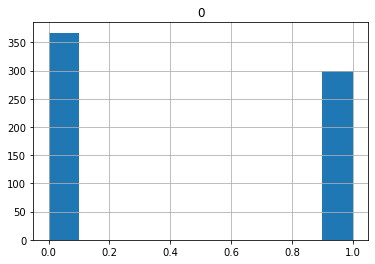

In [94]:
Y1.hist()

In [95]:
run_classifiers(clfs,X,Y1)

NameError: name 'run_classifiers' is not defined

#### The best precision and AUC is given by Random Forest and logistic regression whereas the best accuracy was given by Gradient Boosting and Bagging. 

In [98]:
S = StandardScaler()
S.fit(X)
X_NORM = S.transform(X)

In [99]:
run_classifiers(clfs,X_NORM,Y1)

Accuracy for RF is: 0.790 +/- 0.050
AUC for RF is: 0.841 +/- 0.046
Precision for RF is: 0.806 +/- 0.040
Execution time for RF is: 1.7691166400909424 seconds



Accuracy for KNN is: 0.737 +/- 0.056
AUC for KNN is: 0.818 +/- 0.046
Precision for KNN is: 0.843 +/- 0.039
Execution time for KNN is: 0.12468099594116211 seconds



Accuracy for nb is: 0.716 +/- 0.050
AUC for nb is: 0.793 +/- 0.058
Precision for nb is: 0.819 +/- 0.026
Execution time for nb is: 0.04986906051635742 seconds



Accuracy for gb is: 0.791 +/- 0.055
AUC for gb is: 0.846 +/- 0.050
Precision for gb is: 0.792 +/- 0.032
Execution time for gb is: 2.1163711547851562 seconds



Accuracy for svc is: 0.767 +/- 0.057
AUC for svc is: 0.813 +/- 0.053
Precision for svc is: 0.785 +/- 0.069
Execution time for svc is: 1.8410651683807373 seconds



Accuracy for nn is: 0.784 +/- 0.041
AUC for nn is: 0.851 +/- 0.042
Precision for nn is: 0.790 +/- 0.038
Execution time for nn is: 15.550238609313965 seconds



Accuracy for lr is: 0.766 +/- 

#### Best performance by Random Forest

# Data Imputation

In [ ]:
data=data.iloc[:,:15]


In [ ]:
data = np.delete(data, (71,83,86,92,97,241,252,268,276,284,327,328,404,443,448,454,498,513,590,606,620,624), axis=0)

In [ ]:
X_cat = data[[3,4,5,6,8,9,11,12]]
X_cat

In [ ]:
np.argwhere(np.isnan(col_cat))

In [121]:
col_cat_most_common_imputed = col_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))
col_cat_most_common_imputed

,3,4,5,6,8,9,11,12
0,u,g,w,v,t,t,f,g
1,u,g,q,h,t,t,f,g
2,u,g,q,h,t,f,f,g
3,u,g,w,v,t,t,t,g
4,u,g,w,v,t,f,f,s
...,...,...,...,...,...,...,...,...
683,y,p,e,h,f,f,f,g
684,u,g,c,v,f,t,t,g
685,y,p,ff,ff,f,t,t,g
686,u,g,aa,v,f,f,f,g


In [122]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

In [123]:
X_imp

array([[    30.83 ,      0.   ,      1.25 ,      1.   ,    202.   ,
             0.   ],
       [    58.67 ,      4.46 ,      3.04 ,      6.   ,     43.   ,
           560.   ],
       [    24.5  ,      0.5  ,      1.5  ,      0.   ,    280.   ,
           824.   ],
       [    27.83 ,      1.54 ,      3.75 ,      5.   ,    100.   ,
             3.   ],
       [    20.17 ,      5.625,      1.71 ,      0.   ,    120.   ,
             0.   ],
       [    32.08 ,      4.   ,      2.5  ,      0.   ,    360.   ,
             0.   ],
       [    33.17 ,      1.04 ,      6.5  ,      0.   ,    164.   ,
         31285.   ],
       [    22.92 ,     11.585,      0.04 ,      0.   ,     80.   ,
          1349.   ],
       [    54.42 ,      0.5  ,      3.96 ,      0.   ,    180.   ,
           314.   ],
       [    42.5  ,      4.915,      3.165,      0.   ,     52.   ,
          1442.   ],
       [    22.08 ,      0.83 ,      2.165,      0.   ,    128.   ,
             0.   ],
       [    29.92 ,  

In [124]:
col_cat_most_common_imputed_bin = OneHotEncoder().fit_transform(col_cat_most_common_imputed).toarray()

In [125]:
col_cat_most_common_imputed_bin

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

### Numerical variables

In [130]:
from sklearn.impute import SimpleImputer

In [131]:
X_num = np.copy(X[:,:])
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

### Data Concatenation 

In [132]:
# Normalisation des variables numeriques
scaler3 = StandardScaler()
scaler3.fit(X_num)
X_num = scaler3.transform(X_num)

In [ ]:
# Concatenation
Credit_imputed=np.concatenate((col_cat_most_common_imputed_bin,X_num), axis=1)

In [ ]:
run_classifiers(clfs,Credit_impute,target_credit2)

#  Feature engineering et Classification for textual data

In [138]:
smsdata =pd.read_csv('/Users/Kardoussa/Documents/MachineLearning/AS/AS/SMSSpamCollection.data'
                    ,sep="\t",header=None)
smsdata

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Countvectorizer

In [139]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kardoussa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [140]:
vect = CountVectorizer(stop_words='english')
smsdata

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [142]:
XBOW= vect.fit_transform(smsdata[1])
np.unique(XBOW.toarray())

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 15, 18], dtype=int64)

#### With CountVectorizer we are converting raw text to a numerical vector representation of words
#### we count here the number of times a word appears in the document which results in biasing in favour of most frequent words. 
#### the  fact that we will consider mostly the most frequen words results in ignoring the other rare words which could help in a more efficient data processing.

In [ ]:
Ytext=smsdata[0].copy()
Ytext[smsdata[0]=='ham']=0
Ytext[smsdata[0]=='spam']=1
Ytext=Ytext.astype(float)
run_classifiers(clfs,XBOW,Ytext)

# TFIDF

In [ ]:
tfidf = TfidfTransformer()
Xtfidf = tfidf.fit_transform(XBOW).toarray()

In [ ]:
svd = TruncatedSVD(n_components=30, random_state=1)
XTrunc=svd.fit_transform(Xtfidf)
run_classifiers(clfs,XTrunc.astype(float),Ytext)

#### The only difference is that the TfidfVectorizer() returns floats while the CountVectorizer() returns integers 
#### In TfidfVectorizer we consider all the  document weightage of a word. It helps us in dealing with most frequent words.Using it we can penalize them. 

#### TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

#### We conclude that the results are  much better using TfidfVectorizer

In [ ]:
SVD = TruncatedSVD(n_components=30, random_state=1)
X_Trunc=svd.fit_transform(Xtfidf)
run_classifiers(clfs,X_Trunc.astype(float),Ytext)

In [135]:
pipelineML2 = Pipeline([('count', CountVectorizer(stop_words='english')),
                  ('tfid', TfidfTransformer()),
                  ("Truncated",TruncatedSVD(n_components=30, random_state=1)),
                 ("classifer",RandomForestClassifier(n_estimators=50))])

pipelineML2.fit(smsdata[1],smsdata[0])
with open("pipeline2.py",'wb') as file:
    pickle.dump(pipelineML2,file)

# Data yelp

In [136]:
yelp=pd.read_csv('/Users/Kardoussa/Documents/MachineLearning/AS/AS/yelp-text-by-stars.csv', error_bad_lines=False,sep=';',encoding='ISO-8859-1')
yelp

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
...,...,...
47366,5,This is our favorite coffee place in Montreal!...
47367,5,Had to visit the Carlos bakery and went on a s...
47368,5,Some of the best Tom Yum we've ever had. Also ...
47369,5,"This is the best groomer in the valley, she is..."


In [138]:
yelp_BOW= vec.fit_transform(yelp.iloc[:,1])
yelp_BOW

<47371x62617 sparse matrix of type '<class 'numpy.int64'>'
	with 2075449 stored elements in Compressed Sparse Row format>

In [139]:
Yyelp=yelp.iloc[:,0].copy()
Yyelp=Yyelp.astype(float)
Yyelp[Yyelp<=4]=0
Yyelp[Yyelp>4]=1
#run_classifiers(clfs,X_BOW,target_spam)

In [140]:
tfidf = TfidfTransformer()
yelp_tfidf = tfidf.fit_transform(yelp_BOW).toarray()
yelp_tfidf

MemoryError: Unable to allocate 22.1 GiB for an array with shape (47371, 62617) and data type float64

# SVD, LSA , LSI

In [141]:
svd = TruncatedSVD(n_components=30, random_state=1)
yelp_Trunc=svd.fit_transform(yelp_tfidf)
run_classifiers(clfs,yelp_Trunc.astype(float),Yyelp)

NameError: name 'yelp_tfidf' is not defined

In [142]:
pipelineML2.predict(yelp.iloc[:,1])

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)